# Section 27: Calculus, Cost Functions, and Gradient Descent

## Learning Objectives

- Review basics of calculus (if needed)
    - Derivatives
    - Integrals
    
- Discuss cost functions and how they work/are used (examples from Linear Regression).

- Discuss Cost Functions in Relation to Linear Regression
    - Walk through the process of estimating regression model and updating parameters 

- Discuss Gradient Descent's use of partial derivatives to approximate loss functions.



# Agenda


1. Review last week's notebook.


2. Watch Udemy course snippets:

    - [Data Science Complete Bootcamp](https://www.udemy.com/share/101W9cAEYbdVdWRXQ=/)
        - Section 42: 
            - **288: The Linear Model (Algebraic)** (3 min)
            - **289: The Linear Model with Multiple Inputs** (2 min)
            - **290: The Linear Model with Multiple Inputs & Outputs**(4 min)
            - 295: Optimization Algorithm: 1-Parameter Gradient Descent (7 min)
                - 0m00s ~ 3m30s : 
                    - learning rate($\eta$) and update rule 
                    - Up to first ~2ish examples of learning rates
                - 
                
            - ***296: Optimization Algorithm: n-Parameter Gradient Descent (6 min)***
        - Section 48:
            - **329: Stochastic Gradient Descent (3 min)**
            - **330: Problems with Gradient Descent (2 min)**
            - 331? Momentum (4 min)
            - 332? Learning Rate Schedules (4 min)
            - 334? Adaptive Learning Rate Schedules (4 min)


## Vocabulary/Formulas


So how does this approach of shifting back and forth translate mathematically?  It means we determine the slope in one dimension, then the other. Then, we move where that slope is steepest downwards.  This moves us towards our minimum.  

<center style="font-weight:bold;font-size:1.1=5em"> <h3>Linear Regression to Linear Models </h3></center>

<br><br>
<div style="font-size:1.2em">
$$ \large y = mx+b $$
<br>
<div style="box-border:1 em black;">    
where: 
    
- $x$ = input data for modeling
- $y$ = model] predictions
- $m$ = slope
- $b$ = intercept</div>


**In Linear Model Formula terminology/notation changes:**

- slopes $(m)$ becomes **weights $(w)$**
- constant $b$ becomes **bias $b$**

$$ \large xw+b = y $$


- $x$ = input data for modeling
- $y$ = model] predictions
- $w$ is the weight (slope)
- $b$ is the bias (constant)
</div>
</div>
 x_i w+b = y_i -t? $

### Cost/Loss/Error Functions

- Loss Function: $L(y,t)$

- Cost Function: $C(y,t)$

- Error: $E(y,t)$


### Calculus


#### Derivative:
$f'(x)$ is the instantaneous rate of change in the output of $f(x)$, with respect to $x$.

$$\large f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x}$$

* $f(x)$ is output of $f$ for a given $x$ value.

* $f'(x)$ is the derivative (rate of change) of $f(x)$'s output  


* $\Delta x$ is the size of the step between $x$ values.


* $f(x + \Delta x)$ the output of $f$ for the updated output when $x=(x +\Delta x$)



$$ f'(x) = \dfrac{\text{rise}}{\text{run}} = \dfrac{\Delta y}{\Delta x} =\dfrac{f(x + \Delta x) - f(x)}{\Delta x}$$




#### Gradient:
- Multi-dimensional version of a derivative 
$$-\nabla = \sum_i \dfrac{\partial}{\partial x_i}$$

$$ x_{i+1} = x_i - \eta * f'(x_i)$$


- When minimum is reached, $ \eta *f'(x_i) $ becomes 0. 
$$ x_{i+1} = x_i - 0 $$

- [ADD PIC]

#### Partial Derivative
For example, with our function of $f(x, y) = y*x^2 $, when taking the partial derivative $\frac{df}{dy}f(x, y)$, we treat all values of $x$ as a constant.  Let's do it:


$$\frac{df}{dy}f(x,y) =  \frac{df}{dy}(y) * x^2 = 1*x^2 = x^2$$

<img src="https://raw.githubusercontent.com/learn-co-students/dsc-the-gradient-in-gradient-descent-online-ds-ft-100719/master/images/Denali.jpg">


In fact, the direction of greatest ascent for a function,  $\nabla f(x, y)$, is the direction which is a proportion of $\frac{df}{dy}$ steps in the $y$ direction and $\frac{df}{dx}$ in the $x$ direction.  So, for example, if $\frac{df}{dy}$ = 5 and $\frac{df}{dx}$ = 1, the direction of gradient ascent is five times more in the $y$ direction than the $x$ direction.  And this seems to be the path, more or less that our climbers are taking - some combination of $x$ and $y$, but tilted more towards the $y$ direction.



___
Gradient to Cost Function (Learn.co)
Remember that mathematically, when we say cost function, we use the residual sum of squares where 
$$ 
\begin{align}
RSS &= \sum_{i=1}^n(actual - expected)^2 \\
&= \sum_{i=1}^n(y_i - \hat{y})^2 \\
&= \sum_{i=1}^n(y_i - (mx_i + b))^2
\end{align}
$$ 
for all $x$ and $y$ values of our dataset.  So in the graph directly below, $x_i$ and $y_i$  would be our points representing a movie's budget and revenue.  Meanwhile, $mx_i + b $ is our predicted $y$ value for a given $x$ value, of a budget. 

And RSS takes the difference between $mx_i + b$, the $y_i$ value our regression line (the red line below) predicts, and our actual $y$, and sum up these squares for each piece of data in our dataset.  That is the residual sum of squares.


**Cost Function $J$ (RSS):**
$$
\begin{align}
J(m, b) & = \sum_{i=1}^{n}(y_i - \hat{y})^2\\
J(m, b) & = \sum_{i=1}^{n}(y_i - (mx_i + b))^2 &&\text{notice $\hat{y} = mx + b$}\\
\end{align}
$$


As we know, the gradient of a function is simply the partial derivatives with respect to each of the variables, so:

$$ \nabla J(m, b) = \frac{\delta J}{\delta m}, \frac{\delta J}{\delta b}$$


In calculating the partial derivatives of our function $J(m, b) = \sum_{i=1}^{n}(y_i - (mx_i + b))^2$, **we won't change the result if we ignore the summation until the very end**. 
___

$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta m}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ m}\\
\\
\frac{\delta J}{\delta b}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta b}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ b}\\
\end{align}
$$

## Resources
- [Jeff's Study Group on Gradient Descent](https://youtu.be/G0EV4wcv0ok)

In [1]:
!pip install -U fsds_100719
from fsds_100719.imports import *

fsds_1007219  v0.5.5 loaded.  Read the docs: https://fsds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds_100719,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


Run sect_17_workflow(display=True) for lesson workflow. display=False for running workflow.


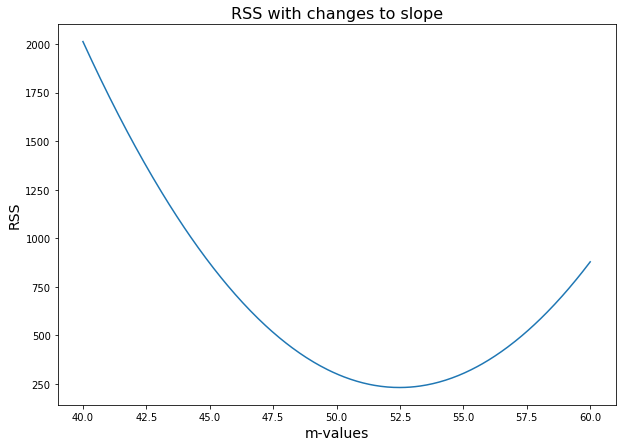

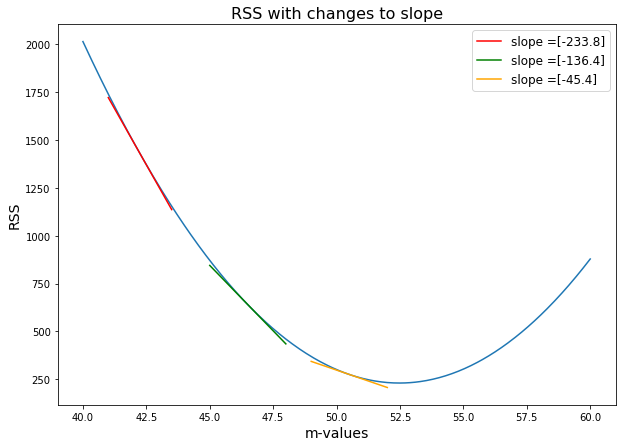

In [2]:
import py_files.sect_17 as sg
# s1
x,y = sg.make_xy()
table_sm =sg.make_table_sm(x,y)
sg.plot_RSS(table_sm)
sg.plot_tangent(table_sm,x,y)

`**kwargs`

def my_funct(args, args2, inde_col=0,**kwargs):





In [ ]:
fs.reload(sg)

## My S.G. Plots

In [3]:
df = sg.load_data()
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x12527b198>)

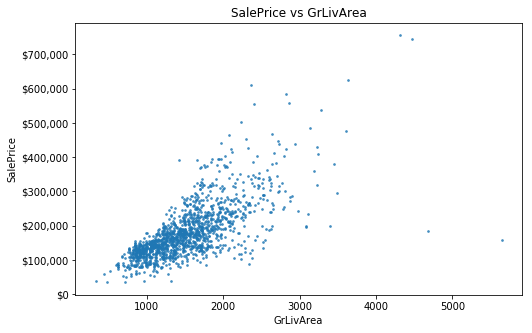

In [4]:
sg.plot_reg(df)

## Updating Our Guess


> Now that we are applying gradient descent to our cost curve $J(m, b)$, the technique should answer how much to move the $m$ variable and the $b$ variable to produce the greatest decrease in cost, or RSS. In other words, when altering our regression line, we want to know how much of this change should be derived from a move in the slope versus how much should be derived from a change in the y-intercept.


$$ \nabla J(m, b) = \frac{\delta J}{\delta m}, \frac{\delta J}{\delta b}$$


$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta m}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ m}\\
\\
\frac{\delta J}{\delta b}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta b}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ b}\\
\end{align}
$$

$ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x_i(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$
$ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

In [ ]:
def loss_function():
    pass

    
def step_parameters():
    pass
    

In [ ]:
def step_gradient():
    pass

# Derivatives Basics

- [Learn Lesson](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-27-calculus-cost-function-and-gradient-descent/rules-for-derivatives)

## Rate of change for a (linear) function

Slope is rate the change for line --> rate is constant

For any two points:

$ \frac{\Delta y}{\Delta x} = \frac{y_2 - y_1}{x_2 - x_1}$

We can define this as a derivative:

$ 
f'(x) = \dfrac{\Delta y}{\Delta x} =  \dfrac{f(x + \Delta x) - f(x)}{\Delta x}
$

# Intro to Gradient Descent

### In summary, derivates are:



$$ f'(x) = \dfrac{\text{rise}}{\text{run}} = \dfrac{\Delta y}{\Delta x} = \dfrac{y_2 - y_1}{x_2 - x_1} =  \dfrac{f(x_2) - f(x_1)}{x_2 - x_1}$$

$$\large f'(x) = \dfrac{f(x + \Delta x) - f(x)}{\Delta x}$$



* $f'(x)$ is the rate of change at a given value, or here the speed at a given time


* $f(x)$ is the distance at a given time


* $\Delta x$ is the elapsed time, or the change in $x$


* $f(x + \Delta x)$ is the distance at the starting time plus the elapsed time 



### For Non-Linear Functions

- [Derivatives on Non-Linear Functions](https://learn.co/tracks/data-science-career-v2/module-4-a-complete-data-science-project-using-multiple-regression/section-27-calculus-cost-function-and-gradient-descent/derivatives-of-non-linear-functions)
$$\large f'(x) = \lim_{ h\to0} \frac{f(x + h) - f(x)}{h} $$ 

* where $h$ is used to represent $\Delta x$

### The Chain Rule

$$h'(x) = (f\circ g)'(x) = f'(g(x)) \cdot g'(x)$$

$$\frac{dh}{dx} = \frac{df}{dg} \cdot \frac{dg}{dx} = f'(y)g'(x) \text{  where } y = g(x)$$ 

# Finding Minimum & Maximum with Derivatives

Tops of hills

In [ ]:
# Functions from Gradient Descent: Step Sizes
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

def regression_formula(x):
    return 1.319 + 52*x

np.random.seed(225)
x =df["GrLivArea"]
y=df["SalePrice"]

m_ = 50
b_ = 3
# x = np.random.rand(30,1).reshape(30)
# y_randterm = np.random.normal(0,3,30)
# y = b_+ m_* x + y_randterm

plt.figure(figsize=(8,6))
plt.plot(x, y, '.b')
plt.plot(x, regression_formula(x), '-')
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14);

In [ ]:
x

In [ ]:
my_slope = 10
def errors(x_values, y_values, m, b):
    y_line = (b + m*x_values)
    return (y_values - y_line)

def squared_errors(x_values, y_values, m, b):
    return np.round(errors(x_values, y_values, m, b)**2, 2)

def residual_sum_squares(x_values, y_values, m, b):
    return round(sum(squared_errors(x_values, y_values, m, b)), 2)

def get_table(x,y,val,my_slope):
    table = np.zeros((20,2))
    import math

    table = [['Val','RSS']]
    for val in range(math.floor(x.min()), math.ceil(x.max())):#enumerate(range(40, 60)):abs
        table.append([val,residual_sum_squares(x, y, val, my_slope)])
    #     table[idx,1] = 
    table = fs.list2df(table)
    return table

get_table(x,y,val,my_slope)

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(table['Val'], table["RSS"], '-')
plt.xlabel("m-values", fontsize=14)
plt.ylabel("RSS", fontsize=14)
plt.title("RSS with changes to slope", fontsize=16);

In [ ]:
def tan_line(start, stop, delta_a,table_sm=table):
    
    xs = np.linspace(start,stop,delta_a)
#     x_dev = np.linspace(start, stop, 100)
    a = (start+stop)/2 
    
    ## How compute?
    f_a = table_sm.loc[table_sm['Val']==a,'Val']
    print(f"f_a = {f_a}")
#     f_a= table_sm[(table_sm[:,0]==a),1]
    
    
    rounded_a_delta_a = round(a+delta_a,2)
    f_a_delta= table_sm[table_sm.loc[table_sm['Val']==rounded_a_delta_a]]
#     f_a_delta= table_sm[(table_sm[:,0]== (rounded_a_delta_a)),1]
    
    # Calc Derivative
    fprime = (f_a_delta-f_a)/delta_a 
    tan = f_a+fprime*(xs-a)
    return fprime, xs, tan

for idx, val in enumerate(np.linspace(40, 60, 401)):
    table_sm[idx,0] = val
    table_sm[idx,1] = residual_sum_squares(x, y, val, 1.319)
    
# table_sm
    


# BOOKMARK

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-descent-step-sizes-online-ds-ft-100719/master/images/snowboard.png" width=70%>

In [ ]:
fprime_1, x_dev_1, y_dev_1 = tan_line(1000, 10005, 1)
fprime_2, x_dev_2,  y_dev_2 = tan_line(3000, 10005, 1)
fprime_3, x_dev_3,  y_dev_3 = tan_line(5000, 10005, 1)


# plt.figure(figsize=(10,7))
# plt.plot(table[:,0], table[:,1], '-')
# plt.plot(x_dev_1, y_dev_1, color = "red",  label = "slope =" + str(fprime_1))
# plt.plot(x_dev_2, y_dev_2, color = "green",  label = "slope =" + str(fprime_2))
# plt.plot(x_dev_3, y_dev_3, color = "orange", label = "slope =" + str(fprime_3))

# plt.xlabel("m-values", fontsize=14)
# plt.ylabel("RSS", fontsize=14)
# plt.legend(loc='upper right', fontsize='large')

# plt.title("RSS with changes to slope", fontsize=16);

# Expanding Gradient Descent for Higher Dimensions

Partial Derivatives

Grad function $-\nabla = \sum_i \dfrac{\partial}{\partial x_i}$

<img src='images/gradientdescent.png' width=80%/>
<img src="https://raw.githubusercontent.com/jirvingphd/dsc-gradient-descent-in-3d-online-ds-ft-100719/master/images/traveller-stepping.jpg" width=80%>

___

# Partial Derivatives (Return To Next Class)




$$ \nabla J(m, b) = \frac{\delta J}{\delta m}, \frac{\delta J}{\delta b}$$


$$
\begin{align}
\frac{\delta J}{\delta m}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta m}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ m}\\
\\
\frac{\delta J}{\delta b}J(m, b) & = \boldsymbol{\frac{\delta J}{\delta b}}(y - (mx + b))^2  &&\text{partial derivative with respect to} \textbf{ b}\\
\end{align}
$$

Lesson adapted from Jeff Herman: https://github.com/sik-flow/Study_Groups/blob/master/Gradient_Descent.ipynb

$ \frac{dJ}{dm}J(m,b) = -2\sum_{i = 1}^n x_i(y_i - (mx_i + b)) = -2\sum_{i = 1}^n x_i*\epsilon_i$
$ \frac{dJ}{db}J(m,b) = -2\sum_{i = 1}^n(y_i - (mx_i + b)) = -2\sum_{i = 1}^n \epsilon_i $

## Arbitrarily choosing a feature and target

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We'll focus on the `GrLivAre` vs the `SalePrice` (target)

In [ ]:
x = df['GrLivArea']
y = df['SalePrice']

In [ ]:
plt.scatter(x, y)
plt.show()

Looks like there are some extreme values that might affect our linear regression

### Removing Outliers

In [ ]:
df[(df['GrLivArea'x] > 4000) & (df['SalePrice'] < 300000)]

In [ ]:
df.drop([523, 1298], inplace = True)
df.reset_index(inplace = True)

In [ ]:
x = df['GrLivArea']
y = df['SalePrice']

In [ ]:
plt.scatter(x, y)
plt.show()

In [ ]:
my_slope = 0
my_intercept = 0

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, my_slope, my_intercept), color = 'k', label = 'Regression')
plt.legend()
plt.show()

In [ ]:
def error(intercept, slope, x, y):
    totalError = 0
    for i in range(0, len(x)):
        totalError += (y[i] - (slope * x[i] + intercept)) ** 2
    return totalError / len(x)

In [ ]:
error(my_intercept, my_slope, x, y)

## Gradient descent one step at a time

We need to find the gradient for each cost function (2-dimensions: b & m):

$$ \frac{\partial}{\partial b} (y_i - (b + ax_i))^2 = 2 \cdot (y_i-ax_i + b)$$

$$ \frac{\partial}{\partial a} (y_i - (b + ax_i))^2 = 2 \cdot x_i \cdot (y_i-ax_i + b)$$

In [ ]:
def partial_deriv(b, a, x_i, y_i, respect_to):
    if respect_to == 'b': 
        return (y_i - (a * x_i + b))
    elif respect_to == 'a':
        return (x_i * (y_i - (a * x_i + b)))
    else:
        print('Choose either respect_to: a or b ')
        return 0       

In [ ]:
def step_gradient(b, a, x, y, learning_rate):
    db = 0
    da = 0 
    # For each data point, update the derivative for the slope & intercept
    N = len(x)
    for i in range(len(x)):
        # Derivatives already pre-done
        
        # Partial derivatives of loss/cost function with respect to b & a
        db +=  -(2/N) * partial_deriv(b,a,x[i],y[i],respect_to='b')
        da +=  -(2/N) * partial_deriv(b,a,x[i],y[i],respect_to='a')
        
    # Adjust the slope & intercept by the gradient
    new_b = b - (learning_rate * db)
    new_a = a - (learning_rate * da)
    
    return (new_b, new_a)

### First Iteration

In [ ]:
first_step = step_gradient(my_intercept, my_slope, x, y, learning_rate=0.1)

# Our Linear Regression Line

In [ ]:
def regression_formula(x, slope, intercept):
    return slope * x + intercept

In [ ]:
first_step

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, first_step[1], first_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.show()

In [ ]:
error(my_intercept, my_slope, x, y)

In [ ]:
error(first_step[0], first_step[1], x, y)

In [ ]:
first_step = step_gradient(my_intercept, my_slope, x, y, learning_rate=0.00000001)

error(first_step[0], first_step[1], x, y)

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, first_step[1], first_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 1')
plt.text(500, 600000, f'Error {round(error(first_step[0], first_step[1], x, y), 0)}')
plt.show()

### Second Iteration

In [ ]:
second_step = step_gradient(first_step[0], first_step[1], x, y, learning_rate=0.00000001)

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, second_step[1], second_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 2')
plt.text(500, 600000, f'Error {round(error(second_step[0], second_step[1], x, y), 0)}')
plt.show()

### Third Iteration

In [ ]:
third_step = step_gradient(second_step[0], second_step[1], x, y, learning_rate=0.00000001)

In [ ]:
fig = plt.figure(figsize = (12, 8))
plt.scatter(x, y, label = 'Raw Data')
plt.plot(x, regression_formula(x, third_step[1], third_step[0]), 
         color = 'k', label = 'Regression')
plt.legend()
plt.text(500, 650000, 'Iteration Number 3')
plt.text(500, 600000, f'Error {round(error(third_step[0], third_step[1], x, y), 0)}')
plt.show()

## Multiple iterations

In [ ]:
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    b, m = step_gradient(b, m, x, y, 0.00000001)

In [ ]:
plt.plot(range(100), errs)
plt.show()

Looks like we didn't have to do the full 100 since it doesn't do much better. We can do **early stopping** when the error doesn't change too much

In [ ]:
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    b, m = step_gradient(b, m, x, y, 0.00000001)
    # Stop after errors don't change too much
    if len(errs) > 1:
        if (errs[-2] - errs[-1]) / errs[-2] < 0.01:
            print (i)
            break

In [ ]:
plt.plot(range(len(errs)), errs)
plt.show()

In [ ]:
errs = []
b = 0
m = 0

for i in range(100):
    err = error(b, m, x, y)
    errs.append(err)
    if (i > 1) & (i % 10 == 0):
        fig = plt.figure(figsize = (12, 8))
        ax1 = plt.subplot(1, 2, 1)
        ax1.scatter(x, y, label = 'Raw Data')
        ax1.plot(x, regression_formula(x, m, b), 
                 color = 'k', label = 'Regression')
        plt.legend()
        ax1.set_title(f'Iteration Number {i}')
        ax2 = plt.subplot(1, 2, 2)
        ax2.plot(range(i + 1), errs)
        ax2.set_title(f'Error {round(error(m, b, x, y), 0)}')
        plt.show()
    b, m = step_gradient(b, m, x, y, 0.00000001)

# Using Scikit-Learn

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linreg = LinearRegression()

In [ ]:
linreg.fit(x.values.reshape(-1, 1), y.values.reshape(-1, 1))

In [ ]:
linreg.coef_[0][0]

In [ ]:
linreg.intercept_[0]

In [ ]:
m, b

In [ ]:
fig = plt.figure(figsize = (12, 8))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

ax1.scatter(x, y, label = 'Raw Data')
ax1.plot(x, regression_formula(x, m, b), 
         color = 'k', label = 'Regression')
ax1.set_title('Gradient Descent')
ax2.scatter(x, y, label = 'Raw Data')
ax2.plot(x, regression_formula(x, linreg.coef_[0][0], linreg.intercept_[0]), 
         color = 'k', label = 'Regression')
ax2.set_title('Sklearn')

In [ ]:
b

In [ ]:
np.sqrt(error(m, b, x, y))

In [ ]:
np.sqrt(error(linreg.coef_[0][0], linreg.intercept_[0], x, y))

In [ ]:
error(m, b, x, y)